**Статистика**

**Задание 1**

Дан набор данных о видеоиграх.


1. Как критики относятся к спортивным играм?

2. Критикам нравятся больше игры на PC или на PS4?

3. Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

* сформулируйте нулевую и альтернативную гипотезы;
* выберите пороговый уровень статистической значимости;
* опишите полученные результаты статистического теста.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
# Посмотрим на данные:
data_video = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv')
data_video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
data_video.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


# **1. Как критики относятся к спортивным играм?**

In [ ]:
# Нулевая гипотеза: критики относятся к спортивным играм также, как ко всем остальным играм.
# Уровень значимости примем равным 5%.
# Сформируем выборку с оценками спортивных игр критиками:
sport_scores_1 = data_video.loc[data_video['Genre'] == 'Sports']['Critic_Score']
len(sport_scores_1)


2348

In [ ]:
# Удалим строки, в которых нет значений (Nan), т.к. информацию об отношении критиков к играм они не несут:
sport_scores = sport_scores_1.dropna()
# Размер выборки и статистики:
sport_scores.describe()

count    1194.000000
mean       71.968174
std        13.878433
min        19.000000
25%        64.000000
50%        75.000000
75%        82.000000
max        98.000000
Name: Critic_Score, dtype: float64

In [ ]:
# Сравнивать полученную выше выборку будем с оценками остальных игр, т.е. с ген. совокупностью:
other_scores_1 = data_video.loc[data_video['Genre'] != 'Sports']['Critic_Score']
len(other_scores_1)

14371

In [ ]:
# Также исключим строки с Nan:
other_scores = other_scores_1.dropna()
# Количество строк и статистики:
other_scores.describe()

count    6943.000000
mean       68.451678
std        13.884206
min        13.000000
25%        60.000000
50%        70.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

In [ ]:
# Дисперсии наборов данных практически одинаковые (13,878 и 13,884), применим для проверки гипотезы t-тест.
# Т.к. сравнивать будем выборку sport_scores с генеральной совокупностью other_scores, воспользуемся одновыборочным критерием Cтьюдента:
stat, p_v = stats.ttest_1samp(a = sport_scores, popmean = other_scores.mean())
stat, p_v

(8.755317599633457, 6.838888719771996e-18)

In [ ]:
# Применение функции ttest_1samp с параметром nan_policy:
s_n, p_v_n = stats.ttest_1samp(a = sport_scores_1, popmean = other_scores_1.mean(), nan_policy='omit')
s_n, p_v_n

(8.755317599633457, 6.8388887197749504e-18)

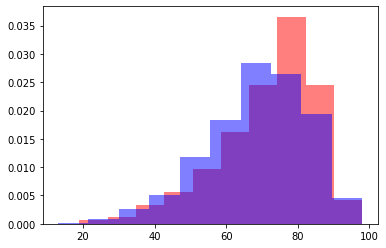

In [ ]:
# p-value значительно меньше уровня значимости - это основание отвергнуть нулевую гипотезу, т.е. критики к спортивным играм относятся иначе, чем к остальным.
# Построим гистограммы для визуализации распределений оценок критиков для двух выборок
plt.hist(sport_scores, alpha = 0.5, color = 'r', density = True);
plt.hist(other_scores, alpha = 0.5, color = 'b', density = True);

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


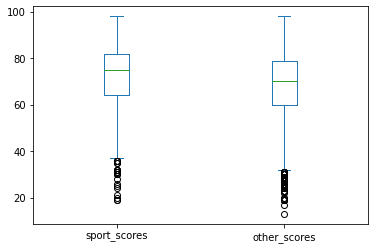

In [ ]:
# Исходя из величин статистик наборов данных (средние, медианные значения), критики при оценке спортивных игр выставляют более высокие оценки.
# Проверим наборы на наличие выбросов, для этого построим боксплоты:
scores = pd.concat([sport_scores, other_scores], axis = 1)
scores.columns = ['sport_scores', 'other_scores']
scores.plot.box();

In [ ]:
# Согласно диаграммам, выбросы имеются, определим их значения по межквартильному размаху (будем считать, что распределение близко к нормальному):
lower_s = sport_scores.quantile(q = 0.025)
upper_s = sport_scores.quantile(q = 0.975)

lower_o = other_scores.quantile(q = 0.025)
upper_o = other_scores.quantile(q = 0.975)
print('Sport_scores:', lower_s, upper_s, 'Other_scores:', lower_o, upper_o)

Sport_scores: 38.0 91.0 Other_scores: 37.0 91.0


In [ ]:
# Выбросы: судя по боксплотам, "подозрительные" значения находятся в нижнем диапазоне оценок критиков, их и удалим:
s = sport_scores.loc[sport_scores < lower_s]
o = other_scores.loc[other_scores < lower_o]
# Количество выбросов в каждом наборе:
len(s), len(o)

(27, 159)

In [ ]:
# Сформируем новые наборы (без выбросов):
sport = sport_scores.loc[~(sport_scores < lower_s)]
other = other_scores.loc[~(other_scores < lower_o)]
len(sport), len(other)

(1167, 6784)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


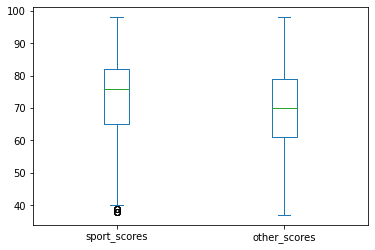

In [ ]:
# Еще раз построим боксплоты:
scores_2 = pd.concat([sport, other], axis = 1)
scores_2.columns = ['sport_scores', 'other_scores']
scores_2.plot.box();

In [ ]:
# Почти все экстремальные значения убраны. Еще раз применим t-тест:
stat_2, p_v_2 = stats.ttest_1samp(a = sport, popmean = other.mean())
stat_2, p_v_2

(9.864886304568879, 4.212885996192033e-22)

In [ ]:
# Выводы оносительно нулевой гипотезы остаются прежними.
# Статистики наборов данных бех выбросов:
sport.describe(), other.describe()

(count    1167.000000
 mean       72.932305
 std        12.457532
 min        38.000000
 25%        65.000000
 50%        76.000000
 75%        82.000000
 max        98.000000
 Name: Critic_Score, dtype: float64, count    6784.000000
 mean       69.334906
 std        12.754530
 min        37.000000
 25%        61.000000
 50%        70.000000
 75%        79.000000
 max        98.000000
 Name: Critic_Score, dtype: float64)

In [ ]:
# Вывод: критики в среднем спортивные игры оценивают выше, чем игры других жанров (все статистики, определяющие средние значения, для спортивных игр выше, чем для остальных).

# **2. Критикам нравятся больше игры на PC или на PS4?**

In [ ]:
data_video[:3]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


In [ ]:
# Сформируем из исходного датафрейма новый - data_video_p - с двумя столбцами (Platform и Critic_Scores), из которого сразу удалим строки с пустыми значениями:
data_video_p = data_video[['Platform', 'Critic_Score']].dropna()
data_video_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8137 entries, 0 to 16709
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      8137 non-null   object 
 1   Critic_Score  8137 non-null   float64
dtypes: float64(1), object(1)
memory usage: 190.7+ KB


In [ ]:
# Нулевая гипотеза: критикам одинаково нравятся игры на PC и игры на PS4.
# Сформируем 2 выборки: с оценками критиков игр на PC (pc_score) и с оценками игр на PS4 (ps4_score).
# Сравнивать будем две выборки, распределение будем считать нормальным, поэтому воспользуемся t-тестом. Уровень значимости примем равным 5%.
pc_score = data_video_p.loc[data_video_p['Platform'] == 'PC']['Critic_Score']
ps4_score = data_video_p.loc[data_video_p['Platform'] == 'PS4']['Critic_Score']
len(pc_score), len(ps4_score)

(715, 252)

In [ ]:
pc_score, ps4_score

(85       86.0
 138      93.0
 192      88.0
 218      93.0
 284      96.0
          ... 
 16644    51.0
 16696    80.0
 16700    61.0
 16706    60.0
 16709    63.0
 Name: Critic_Score, Length: 715, dtype: float64, 42       97.0
 77       82.0
 92       83.0
 94       85.0
 105      87.0
          ... 
 16490    42.0
 16503    70.0
 16504    69.0
 16530    61.0
 16534    51.0
 Name: Critic_Score, Length: 252, dtype: float64)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


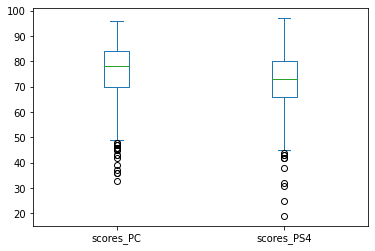

In [ ]:
# Построим боксплоты:
scores_p = pd.concat([pc_score, ps4_score], axis = 1)
scores_p.columns = ['scores_PC', 'scores_PS4']
scores_p.plot.box();

In [ ]:
# Согласно боксплотам, выбросы находятся в нижнем диапазоне оценок. Рассчитаем 25-ые квантили:

lower_pc = pc_score.quantile(q = 0.025)
lower_ps4 = ps4_score.quantile(q = 0.025)

lower_pc, lower_ps4

(49.85, 42.275)

In [ ]:
# Удалим из выборок экстремальные значения, меньшие 25-ых квантилей:
pc_ex = pc_score.loc[pc_score < lower_pc]
ps4_ex = ps4_score.loc[ps4_score < lower_ps4]
# Количество выбросов в каждой выборке:
len(pc_ex), len(ps4_ex)

(18, 7)

In [ ]:
# Сформируем новые выборки (без выбросов):
pc = pc_score.loc[~(pc_score < lower_pc)]
ps4 = ps4_score.loc[~(ps4_score < lower_ps4)]
len(pc), len(ps4)

(697, 245)

In [ ]:
pc.describe(), ps4.describe()

(count    697.000000
 mean      76.776184
 std        9.942875
 min       50.000000
 25%       71.000000
 50%       78.000000
 75%       84.000000
 max       96.000000
 Name: Critic_Score, dtype: float64, count    245.000000
 mean      73.216327
 std       10.619255
 min       43.000000
 25%       67.000000
 50%       74.000000
 75%       81.000000
 max       97.000000
 Name: Critic_Score, dtype: float64)

In [ ]:
# Выполним t-тест:
stat, p_value = stats.ttest_ind(pc, ps4)
stat, p_value

(4.734851155768894, 2.5295966737539538e-06)

In [ ]:
# p-value значительно меньше уровня значимости - это основание отвергнуть нулевую гипотезу, т.е. критики по-разному относятся к играм на PC и на PS4.
# Рассчитаем и сравним статистики выборок:
pc.describe(), ps4.describe()

(count    697.000000
 mean      76.776184
 std        9.942875
 min       50.000000
 25%       71.000000
 50%       78.000000
 75%       84.000000
 max       96.000000
 Name: Critic_Score, dtype: float64, count    245.000000
 mean      73.216327
 std       10.619255
 min       43.000000
 25%       67.000000
 50%       74.000000
 75%       81.000000
 max       97.000000
 Name: Critic_Score, dtype: float64)

In [ ]:
# Применим критерий Уэлча:
stat_w, p_value_w = stats.ttest_ind(pc, ps4, equal_var = False)
stat_w, p_value_w

(4.587667727089822, 5.989167160850779e-06)

In [ ]:
# В результате применения критерия Уэлча вывод остается тем же: нулевую гипотезу отвергаем.

In [ ]:
# Исходя из значений статистик, критики в среднем выше оценивают игры на платформе PC, чем на PS4:
# среднее и медиана выборок для PC выше аналогичных величин для PS4 примерно на 4 балла; кроме того, самые худшие игры на PC (мин. оценка 50) критики оценивают
# на ~7 баллов выше, чем худшие игры на PS4 (мин. оценка 43 балла). Максимальные оценки для обеих групп почти одинаковы (96 и 97 соответственно для PC и PS4).
# Вывод: критикам в среднем больше наравятся игры на платформе PC, чем на платформе PS4.

# **3. Критикам больше нравятся стрелялки или стратегии?**

In [ ]:
data_video[:5]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_video.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [ ]:
# Сформируем из исходного датафрейма новый со столбцами Genre и Critic_Score, удалим строки с пустыми значениями оценок:
df_genre = data_video[['Genre', 'Critic_Score']].dropna()
df_genre .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8137 entries, 0 to 16709
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Genre         8137 non-null   object 
 1   Critic_Score  8137 non-null   float64
dtypes: float64(1), object(1)
memory usage: 190.7+ KB


In [ ]:
# Нулевая гипотеза: критикам одинаково нравятся стрелялки и стратегии.
# Сравнивать будем две выборки, поэтому порядок решения будет аналогичен предыдущей задаче:
# Сформируем 2 выборки: с оценками критиков стрелялок (shoot_score) и с оценками стратегий (strat_score).
# Сравнивать будем две выборки, распределение будем считать нормальным, воспользуемся t-тестом. Уровень значимости примем равным 5%.
shoot_score = df_genre.loc[df_genre['Genre'] == 'Shooter']['Critic_Score']
strat_score = df_genre.loc[df_genre['Genre'] == 'Strategy']['Critic_Score']
len(shoot_score), len(strat_score)

(944, 302)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


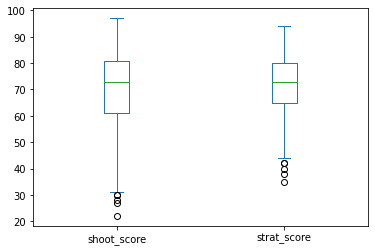

In [ ]:
# Построим боксплоты:
shoot_strat = pd.concat([shoot_score, strat_score], axis = 1)
shoot_strat.columns = ['shoot_score', 'strat_score']
shoot_strat.plot.box();

In [ ]:
# Согласно боксплотам, выбросы находятся в нижнем диапазоне оценок. Рассчитаем 25-ые квантили:

lower_shoot = shoot_score.quantile(q = 0.025)
lower_strat = strat_score.quantile(q = 0.025)

lower_shoot, lower_strat

(36.0, 45.525)

In [ ]:
# Удалим из выборок экстремальные значения, меньшие 25-ых квантилей:
shoot_ex = shoot_score.loc[shoot_score < lower_shoot]
strat_ex = strat_score.loc[strat_score < lower_strat]
# Количество выбросов в каждой выборке:
len(shoot_ex), len(strat_ex)

(23, 8)

In [ ]:
# Сформируем новые выборки (без выбросов):
shoot = shoot_score.loc[~(shoot_score < lower_shoot)]
strat = strat_score.loc[~(strat_score < lower_strat)]
len(shoot), len(strat)

(921, 294)

In [ ]:
# Выполним t-тест:
stat_g, p_value_g = stats.ttest_ind(shoot, strat)
stat_g, p_value_g

(-2.089461967103306, 0.03687408622454287)

In [ ]:
# p-value меньше уровня значимости, хотя и не на много, - отвергаем нулевую гипотезу, т.е. считаем, что критики по-разному относятся к стрелялкам и стратегиям.
# Рассчитаем и сравним статистики выборок, построим гистограммы:
shoot.describe(), strat.describe()

(count    921.000000
 mean      71.129207
 std       13.412341
 min       36.000000
 25%       63.000000
 50%       73.000000
 75%       81.000000
 max       97.000000
 Name: Critic_Score, dtype: float64, count    294.000000
 mean      72.925170
 std       10.806766
 min       46.000000
 25%       66.000000
 50%       74.000000
 75%       80.000000
 max       94.000000
 Name: Critic_Score, dtype: float64)

In [ ]:
# Тест Уэлча:
stat_g_w, p_value_g_w = stats.ttest_ind(shoot, strat, equal_var=False)
stat_g_w, p_value_g_w

(-2.3331014791673663, 0.019969432434896014)

In [ ]:
# Тест Уэлча подтверждает сделанные выводы: нулевую гипотезу отвергаем.

(array([0.00779478, 0.00566893, 0.01488095, 0.02054989, 0.02763605,
        0.03117914, 0.04039116, 0.02692744, 0.02338435, 0.00992063]),
 array([46. , 50.8, 55.6, 60.4, 65.2, 70. , 74.8, 79.6, 84.4, 89.2, 94. ]),
 <a list of 10 Patch objects>)

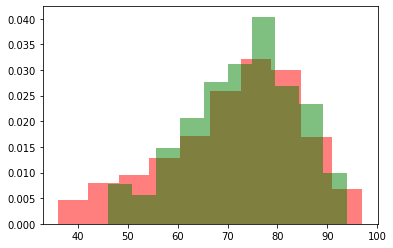

In [ ]:
plt.hist(shoot, alpha = 0.5, color = 'r', density = True);
plt.hist(strat, alpha = 0.5, color = 'g', density = True)

In [ ]:
# Исходя из значений статистик и гистограмм, критики в среднем немного выше оценивают стратегии, нежели стрелялки.
# Среднее и меданное значения оценок для стратегий немного выше, чем аналогичные значения для стрелялок (примерно на 1 балл). Худшие стрелялки (мин. оценка 36 баллов)
# критики оценивают ниже, чем худшие стратегии (мин. оценка 46 баллов).
# Судя по гистограммам, распределения сдвинуты влево, причем для выбрки с оценками стрелялок сильнее (значит среди стрелялок больше низкорейтинговых игр).
# При этом средние оценки для стратегий, выставленные критиками, выше, чем для стрелялок.
# Вывод: критикам в среднем больше наравятся стратегии, чем стрелялки.

**Задание 2**

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь: https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv) по признаку спама. Для этого:

1. Привидите весь текст к нижнему регистру;
2. Удалите мусорные символы;
3. Удалите стоп-слова;
4. Привидите все слова к нормальной форме;
5. Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```
Можете поэкспериментировать с параметрами TfidfVectorizer;
6. Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;
7. Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;
8. Опишите результаты при помощи confusion_matrix;
9. Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data.iloc[4825]

Category                                                  ham
Message     not thought bout it drink in tap spile at seve...
Name: 4825, dtype: object

In [ ]:
# В ходе решения понадобятся библиотеки nltk, re и sklearn:
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer


**1. Привидите весь текст к нижнему регистру.**

**2. Удалите мусорные символы.**

In [ ]:
# Приведем весь текст к нижнему регистру и удалим все символы, кроме букв:
data['Message'] = data['Message'].str.lower()
data = data.replace('[\W_]+', ' ', regex = True)
data

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home
5569,ham,pity was in mood for that so any other suggest...
5570,ham,the guy did some bitching but i acted like i d...


**3. Удалите стоп-слова.**

In [ ]:
# Загрузка стоп-слов из библиотеки nltk:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Удаление стоп-слов:
stopwords_set = set(stopwords.words("english"))
def stpwrd(str_):
    lst = []
    str_list = str_['Message'].split(' ')
    for word in stopwords_set:
        lst = [word for word in str_list if word not in stopwords_set]
    return " ".join(lst)

In [ ]:
# В результате применения функции stpwrd получаем набор (Series) сообщений, из которых стоп-слова исключены:
data_no_sw = data.apply(stpwrd, axis = 1)
data_no_sw

0       go jurong point crazy available bugis n great ...
1                                ok lar joking wif u oni 
2       free entry 2 wkly comp win fa cup final tkts 2...
3                    u dun say early hor u c already say 
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u 750 pound prize 2...
5568                         ü b going esplanade fr home 
5569                               pity mood suggestions 
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Length: 5572, dtype: object

**4. Привидите все слова к нормальной форме.**

In [ ]:
# Выполним лемматизацию сообщений в наборе data_no_sw:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def lemma_func (raw):
    lem_list = []
    list_w = raw.split(' ')
    for word in raw:
        lem_list = [wordnet_lemmatizer.lemmatize(word) for word in list_w]
    return " ".join(lem_list)

In [ ]:
data_lem = data_no_sw.apply(lemma_func)
data_lem

0       go jurong point crazy available bugis n great ...
1                                ok lar joking wif u oni 
2       free entry 2 wkly comp win fa cup final tkts 2...
3                    u dun say early hor u c already say 
4                     nah think go usf life around though
                              ...                        
5567    2nd time tried 2 contact u u 750 pound prize 2...
5568                         ü b going esplanade fr home 
5569                                pity mood suggestion 
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Length: 5572, dtype: object

In [ ]:
# Чтобы вернуть датафрейм со столбцами 'Category' и 'Message', соединим набор data_lem со столбцом 'Category' исходного датафрейма:
data_categ = data['Category']
data_categ

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

In [ ]:
df = pd.DataFrame({'Category':data_categ, 'Message':data_lem})
df

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though
...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,ü b going esplanade fr home
5569,ham,pity mood suggestion
5570,ham,guy bitching acted like interested buying some...


**5. Преобразуйте все сообщения в вектора TF-IDF.**

In [ ]:
# Преобразуем все сообщения в вектора TF-IDF:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf_matrix

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**6. Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split.**

In [ ]:
# Разделение данных на тестовые и тренировочные в соотношении 30/70:
from sklearn.model_selection import train_test_split

In [ ]:
X = tfidf_matrix
y = df.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**7. Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных.**

In [ ]:
# Модель логистической регрессии:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
# Прогноз:
y_predict = model.predict(X_test)
y_predict

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [ ]:
# Оценка точности логистической модели на тестовых данных:
from sklearn.metrics import accuracy_score

In [ ]:
# Оцениваем качество на выборке для тестирования
a_s = accuracy_score(y_test, model.predict(X_test))
a_s

0.958732057416268

**8. Опишите результаты при помощи confusion_matrix.**

In [ ]:
# Описание результатов при помощи confusion_matrix:
from sklearn.metrics import confusion_matrix

In [ ]:
c_m = confusion_matrix(y_true=y_test, y_pred=y_predict, labels=['ham', 'spam'])
print(c_m)
print(f'\nЭлементы матрицы: {c_m[0][0]} - количество сообщений, верно распознанных как не спам; {c_m[1][1]} - количество сообщений, верно распознанных как спам;')
print(f'{c_m[0][1]} - количество сообщений, ошибочно принятых за спам; {c_m[1][0]} - количество спам-сообщений, ошибочно отнесенных к категории "ham".')
print(f'\nТаким образом, категория {c_m[0][0]+c_m[1][1]} сообщений ({a_s*100:.0f} % от общего числа) предсказана верно, а {c_m[0][1]+c_m[1][0]} сообщений - ошибочно.')

[[1445    3]
 [  66  158]]

Элементы матрицы: 1445 - количество сообщений, верно распознанных как не спам; 158 - количество сообщений, верно распознанных как спам;
3 - количество сообщений, ошибочно принятых за спам; 66 - количество спам-сообщений, ошибочно отнесенных к категории "ham".

Таким образом, категория 1603 сообщений (96 % от общего числа) предсказана верно, а 69 сообщений - ошибочно.


**9. Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).**

In [ ]:
# Сформируем датафрейм из значений категорий для тестового набора и предсказанного:
datafr = pd.DataFrame({'Category_true':y_test, 'Category_pred':y_predict})
# Оставим только те строки, для которых предсказанные значения не равны действительным:
df1 = datafr.loc[datafr['Category_true'] != datafr['Category_pred']]
df1

,Category_true,Category_pred
2952,ham,spam
881,spam,ham
1961,spam,ham
3864,spam,ham
2575,spam,ham
...,...,...
4543,spam,ham
752,spam,ham
309,spam,ham
495,ham,spam


In [ ]:
# Соединим df1 со столбцом 'Message', удалим строки с правильно предсказанными категориями сообщений, получим искомый датафрейм:
df_wrong = pd.concat([df1, df['Message']], axis=1).dropna()
df_wrong

,Category_true,Category_pred,Message
15,spam,ham,xxxmobilemovieclub use credit click wap link n...
19,spam,ham,england v macedonia dont miss goal team news t...
68,spam,ham,hear new divorce barbie come ken stuff
95,spam,ham,free ringtone waiting collected simply text pa...
135,spam,ham,want 2 get laid tonight want real dogging loca...
...,...,...,...
4652,spam,ham,400 xmas reward waiting computer randomly pick...
5037,spam,ham,believe true incredible txts reply g learn tru...
5120,spam,ham,private 2003 account statement 078
5366,spam,ham,400 xmas reward waiting computer randomly pick...
